In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn . preprocessing import PolynomialFeatures

In [2]:
train = pd.read_csv('train_2_features.csv')
valid=pd.read_csv('valid_2_features.csv')
test=pd.read_csv('test_2_features.csv')

In [3]:
feature1 = train.columns[0]
feature2 = train.columns[1]
target_col = train.columns[2]

print(f"feature 1 : {feature1}, feature 2: {feature2} and target value/output : {target_col}")

feature 1 : C6H6(GT), feature 2: PT08.S2(NMHC) and target value/output : CO


In [4]:
features = train.columns[0:2].tolist()
features

['C6H6(GT)', 'PT08.S2(NMHC)']

In [5]:
X_train = train[[feature1] + [feature2]]
y_train = train[target_col]

X_valid = valid[[feature1] + [feature2]]
y_valid = valid[target_col]

X_test = test[[feature1] + [feature2]]
y_test = test[target_col]

In [11]:
# Training the model
degrees = [2, 3, 4, 5]
rmse_train ={}
rmse_valid ={}
rmse_test ={}

y_train_pred ={}
y_valid_pred ={}
y_test_pred ={}


for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly,y_train)

    y_train_pred[d] = model.predict(X_train_poly)
    y_valid_pred[d] = model.predict(X_valid_poly)
    y_test_pred[d] = model.predict(X_test_poly)

    rmse_train[d] = np.sqrt(mean_squared_error(y_train, y_train_pred[d]))
    rmse_valid[d] = np.sqrt(mean_squared_error(y_valid, y_valid_pred[d]))
    rmse_test[d] = np.sqrt(mean_squared_error(y_test, y_test_pred[d]))

In [36]:
best_degree = 2
for d in degrees:
    print(f"For degree: {d}")
    print(f"RMSE train is: {rmse_train[d]}")
    print(f"RMSE valid is: {rmse_valid[d]}")
    print(f"RMSE test is: {rmse_test[d]}")
    
    if rmse_valid[d] < rmse_valid[best_degree]:
        best_degree = d
    
    print("\n\n")

print("Best degree based on validation data: ", best_degree)

For degree: 2
RMSE train is: 0.6545959298135535
RMSE valid is: 0.6525056872821061
RMSE test is: 0.6078129202507846



For degree: 3
RMSE train is: 0.646579517494547
RMSE valid is: 0.6475980372315587
RMSE test is: 0.600909888714023



For degree: 4
RMSE train is: 0.6438947043072315
RMSE valid is: 0.646227617809126
RMSE test is: 0.5983354279772837



For degree: 5
RMSE train is: 0.6425040568247714
RMSE valid is: 0.6441391281899201
RMSE test is: 0.6005262491160311



Best degree based on validation data:  5


In [38]:
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly,y_train)

y_test_pred_best = model.predict(X_test_poly)

rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))

print(f"RMSE for test data for best degree : {best_degree} is {rmse_test_best}")

RMSE for test data for best degree : 5 is 0.6005262491160311


In [39]:
rmse_valid

{2: 0.6525056872821061,
 3: 0.6475980372315587,
 4: 0.646227617809126,
 5: 0.6441391281899201}

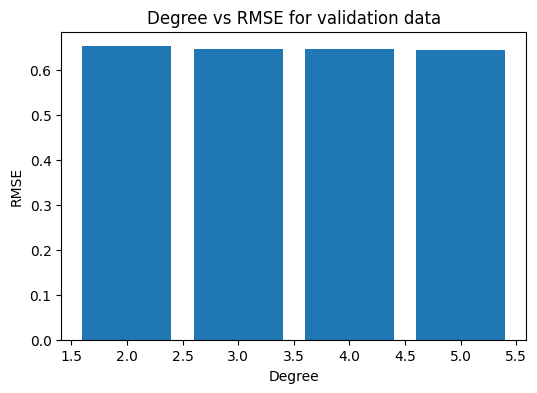

RMSE keys: dict_keys([2, 3, 4, 5]) and RMSE values: dict_values([0.6525056872821061, 0.6475980372315587, 0.646227617809126, 0.6441391281899201])


In [41]:
plt.figure(figsize=(6,4))
plt.bar(rmse_valid.keys(), rmse_valid.values())
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("Degree vs RMSE for validation data")
plt.show()

print(f"RMSE keys: {rmse_valid.keys()} and RMSE values: {rmse_valid.values()}")

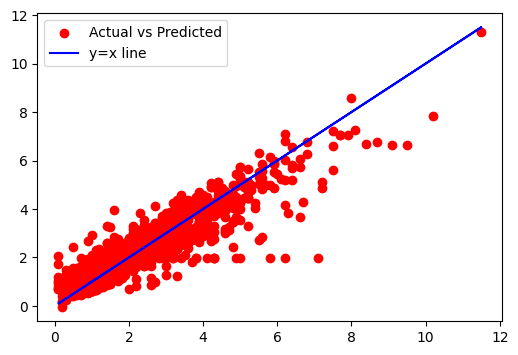

In [42]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_test_pred_best, color="red", label="Actual vs Predicted")
plt.plot(y_test, y_test, color="blue", label="y=x line")
plt.legend()
plt.show()

In [31]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
print(X_train_poly)

[[1.000000e+00 1.460000e+01 1.136000e+03 2.131600e+02 1.658560e+04
  1.290496e+06]
 [1.000000e+00 1.180000e+01 1.044000e+03 1.392400e+02 1.231920e+04
  1.089936e+06]
 [1.000000e+00 1.540000e+01 1.160000e+03 2.371600e+02 1.786400e+04
  1.345600e+06]
 ...
 [1.000000e+00 2.700000e+00 6.360000e+02 7.290000e+00 1.717200e+03
  4.044960e+05]
 [1.000000e+00 3.600000e+00 6.870000e+02 1.296000e+01 2.473200e+03
  4.719690e+05]
 [1.000000e+00 1.200000e+01 1.048000e+03 1.440000e+02 1.257600e+04
  1.098304e+06]]


/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


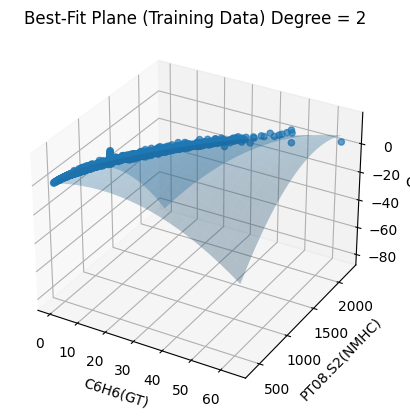

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[feature1], X_train[feature2], y_train, alpha=0.7)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

    # Create a mesh for plotting the plane
x_surf = np.linspace(X_train[feature1].min(), X_train[feature1].max(), 20)
y_surf = np.linspace(X_train[feature2].min(), X_train[feature2].max(), 20)
    
# x_surf_poly = poly.transform(x_surf)
# y_surf_poly = poly.transform(y_surf)
    
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

model = LinearRegression()
model.fit(X_train_poly,y_train)

# y_train_pred[d] = model.predict(X_train_poly)

    
z_surf = model.predict(poly.transform(np.column_stack((x_surf.ravel(), y_surf.ravel()))))
z_surf = z_surf.reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(target_col)
ax.set_title("Best-Fit Plane (Training Data) Degree = 2")
plt.show()

/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


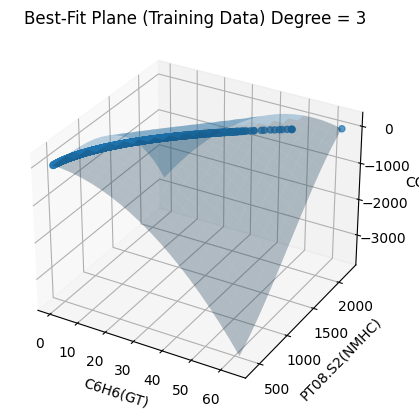

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[feature1], X_train[feature2], y_train, alpha=0.7)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

    # Create a mesh for plotting the plane
x_surf = np.linspace(X_train[feature1].min(), X_train[feature1].max(), 20)
y_surf = np.linspace(X_train[feature2].min(), X_train[feature2].max(), 20)
    
# x_surf_poly = poly.transform(x_surf)
# y_surf_poly = poly.transform(y_surf)
    
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

model = LinearRegression()
model.fit(X_train_poly,y_train)

# y_train_pred[d] = model.predict(X_train_poly)

    
z_surf = model.predict(poly.transform(np.column_stack((x_surf.ravel(), y_surf.ravel()))))
z_surf = z_surf.reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(target_col)
ax.set_title("Best-Fit Plane (Training Data) Degree = 3")
plt.show()

/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


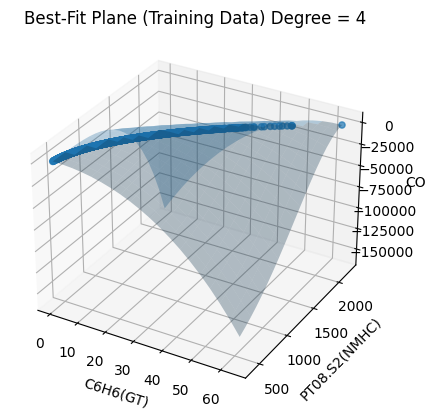

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[feature1], X_train[feature2], y_train, alpha=0.7)

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)

    # Create a mesh for plotting the plane
x_surf = np.linspace(X_train[feature1].min(), X_train[feature1].max(), 20)
y_surf = np.linspace(X_train[feature2].min(), X_train[feature2].max(), 20)
    
# x_surf_poly = poly.transform(x_surf)
# y_surf_poly = poly.transform(y_surf)
    
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

model = LinearRegression()
model.fit(X_train_poly,y_train)

# y_train_pred[d] = model.predict(X_train_poly)

    
z_surf = model.predict(poly.transform(np.column_stack((x_surf.ravel(), y_surf.ravel()))))
z_surf = z_surf.reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(target_col)
ax.set_title("Best-Fit Plane (Training Data) Degree = 4")
plt.show()

/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


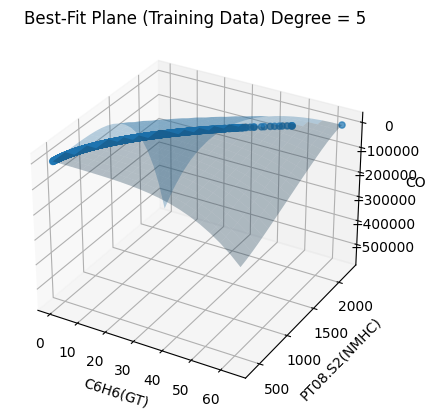

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[feature1], X_train[feature2], y_train, alpha=0.7)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)

    # Create a mesh for plotting the plane
x_surf = np.linspace(X_train[feature1].min(), X_train[feature1].max(), 20)
y_surf = np.linspace(X_train[feature2].min(), X_train[feature2].max(), 20)
    
# x_surf_poly = poly.transform(x_surf)
# y_surf_poly = poly.transform(y_surf)
    
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

model = LinearRegression()
model.fit(X_train_poly,y_train)

# y_train_pred[d] = model.predict(X_train_poly)

    
z_surf = model.predict(poly.transform(np.column_stack((x_surf.ravel(), y_surf.ravel()))))
z_surf = z_surf.reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.3)
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(target_col)
ax.set_title("Best-Fit Plane (Training Data) Degree = 5")
plt.show()